# Diwali Sales Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diwali_sales_data.csv', encoding = 'unicode_escape')
df.sample(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
3332,1004470,Sylvia,P00245642,F,36-45,38,0,Kerala,Southern,Lawyer,Food,3,11881.0,NaN,NaN
8707,1003282,Ordway,P00090942,F,46-50,49,1,Uttar Pradesh,Central,Banking,Clothing & Apparel,1,5315.0,NaN,NaN
1696,1003509,Garverick,P00017042,F,18-25,23,0,Delhi,Central,Textile,Food,3,15860.0,NaN,NaN
9294,1000780,Ishit,P00208742,F,26-35,29,0,Uttar Pradesh,Central,Healthcare,Food,2,4278.0,NaN,NaN
4919,1000092,Gene,P00251542,M,18-25,22,1,Delhi,Central,Banking,Clothing & Apparel,3,8785.0,NaN,NaN
4598,1000214,Kargatis,P00156742,F,18-25,25,0,Jharkhand,Eastern,Banking,Electronics & Gadgets,1,9727.0,NaN,NaN
6960,1004210,Donatelli,P00161542,M,26-35,27,1,Madhya Pradesh,Central,Govt,Clothing & Apparel,1,7112.0,NaN,NaN
8265,1005553,Butterfield,P00015942,F,36-45,42,1,Madhya Pradesh,Central,Healthcare,Electronics & Gadgets,3,5875.0,NaN,NaN
9251,1004643,Christine,P0099242,F,26-35,30,1,Madhya Pradesh,Central,Food Processing,Beauty,2,4438.0,NaN,NaN
5594,1005107,Pratyusmita,P00003942,M,46-50,49,1,Uttar Pradesh,Central,Aviation,Sports Products,3,8120.0,NaN,NaN


In [3]:
# Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
# Removing 'Status' and 'unnamed1' as they don't have any entry

df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
# Checking null values 

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
# Removing null values and changing data type of 'Amount' from float to int

df.dropna(inplace=True)
df['Amount'] = df['Amount'].astype('int')

In [7]:
# Summary 

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [8]:
# Summary of only 'Age','Orders', and 'Amount'

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA

## Gender

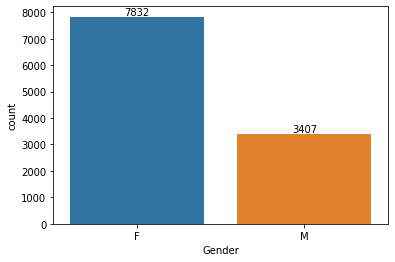

In [9]:
# Count of buyers based on Gender

ax = sns.countplot(data=df,x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

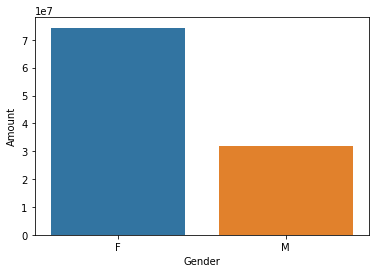

In [10]:
# Buying power based on Gender

sales_gender = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ay = sns.barplot(x='Gender',y='Amount',data=sales_gender)

### From above observation, we can say that most of the buyers are female and even the purchasing power of females are higher than males.

# Age

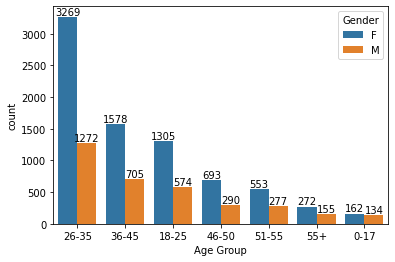

In [11]:
# Count of buyers based on Age Group and Gender

ay = sns.countplot(data=df, x='Age Group', order=df['Age Group'].value_counts().index,hue='Gender')
for bars in ay.containers:
    ay.bar_label(bars)

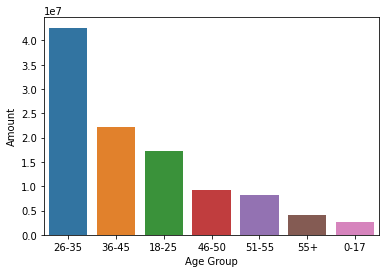

In [12]:
# Purchasing power based on Age Group
az = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
x =sns.barplot(x='Age Group',y='Amount',data = az)

### From the above observation, we can say that the most number of buyers are from age group 26-35 with more number of females in that, followed by 36-45. 
### The purchasing power of age group 26-35 is also higher than all the other age groups .

# State

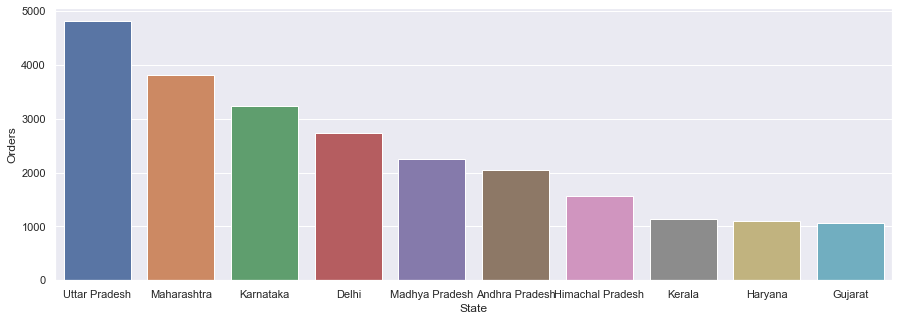

In [23]:
# Total number of orders frome top 10 state
a_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
st = sns.barplot(x='State',y='Orders',data=a_state)
sns.set(rc = {'figure.figsize':(25,5)})

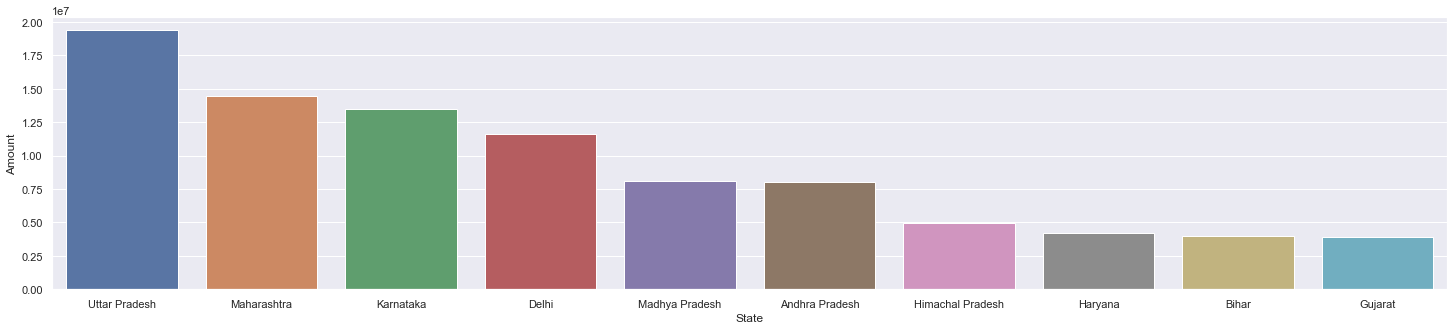

In [14]:
# Total amount from top 10 states
a_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
st = sns.barplot(x='State',y='Amount',data=a_state)
sns.set(rc = {'figure.figsize':(15,5)})

### We can observe that most of the orders and amount spent are from Uttar Pradesh, Maharashtra and Karnataka.
### One more insight we can see here is that the number of orders of Haryana is less than Kerala but the amount spent by Haryana is more than Kerala

# Marital Status 

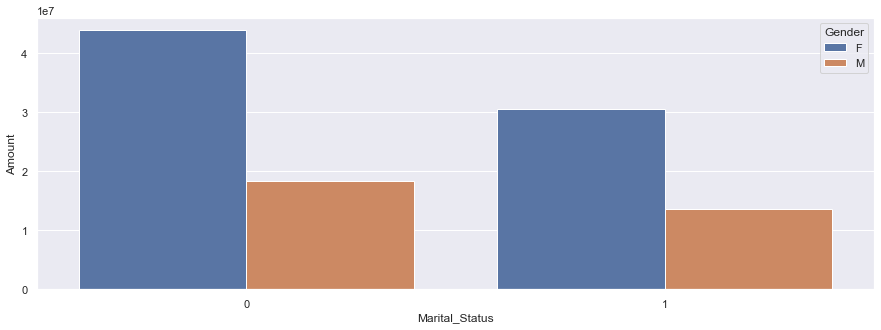

In [15]:
# Purchasing power based on the marital status and gender
# 0 is for married and 1 is for not married

a_m_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=a_m_status,hue='Gender')
sns.set(rc = {'figure.figsize':(10,5)})

### From above graph we can observe that the purchasing power of the married (women) people are more.

# Occupation

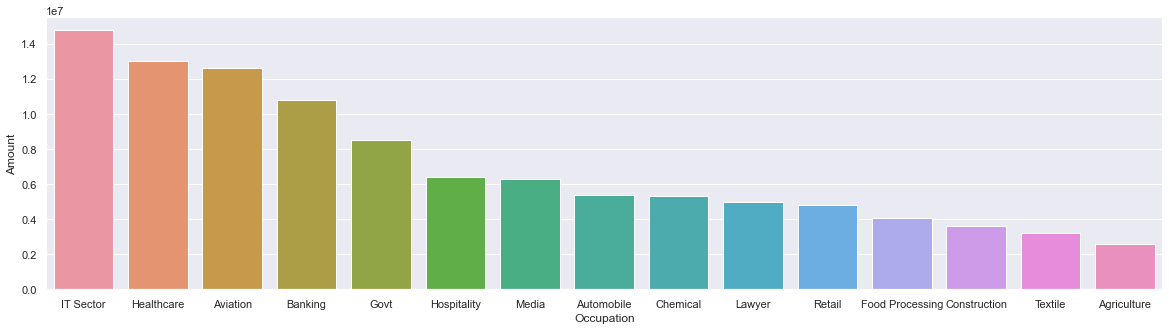

In [22]:
# Purchasing power based on the occupation of customers
state_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=state_occupation)
sns.set(rc = {'figure.figsize':(15,5)})

### We can observe from above graph that most of the buyers are working in IT Sector, Healthcare, Aviation, Banking and Govt.

# Product Category

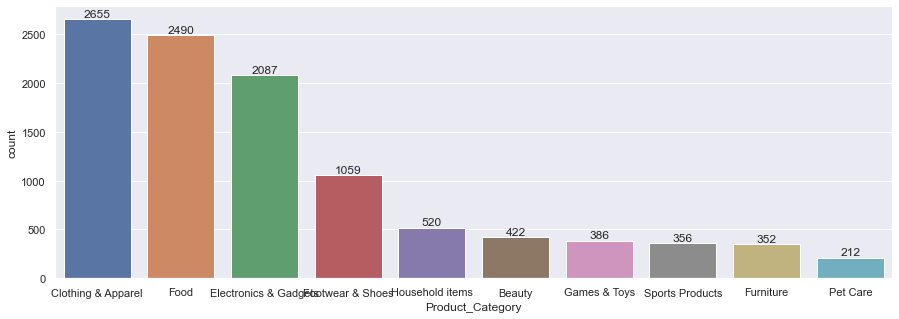

In [17]:
# Number of orders based on Top 10 Product category
sns.set(rc = {'figure.figsize':(15,5)})
pc = sns.countplot(x='Product_Category',data=df,order = df['Product_Category'].value_counts().iloc[:10].index)
for bars in pc.containers:
    pc.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

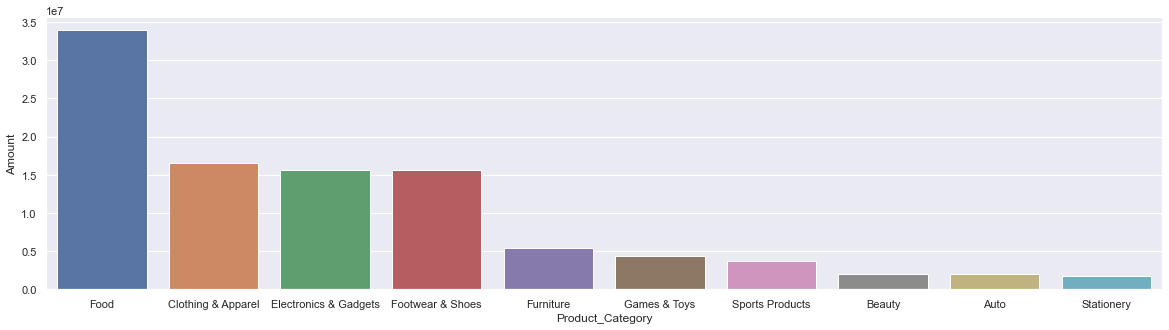

In [21]:
# Purchasing power based on the Top 10 Product category
sns.set(rc = {'figure.figsize':(20,5)})
sales_pdt_category = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_pdt_category)

### We can observe that most of the sold products are from Food, Clothing, Electronics and Footwear category.

### Despite the lower number of orders, the food category generates higher revenue than Clothing category, suggesting that the food items might be priced higher or have better profit margins, resulting in increased revenue.

## Summary :### Demographics and Market Presence:

##### Female buyers dominate the market, indicating their significant presence and purchasing power.
##### The age groups of 26-35 and 36-45 contribute the most to the buyer base, with the 26-35 age group displaying higher purchasing power.

### Regional and Consumer Behavior:

##### Uttar Pradesh, Maharashtra, and Karnataka show the highest sales volume and spending.
##### Married individuals, particularly women, exhibit higher purchasing power.
##### Buyers in the IT sector, healthcare, aviation, banking, and government sectors are prominent segments.
##### Food, clothing, electronics, and footwear are the top-selling product categories.
##### Despite fewer orders, the food category generates higher revenue, suggesting potential higher prices or better profit margins in that industry.